# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [317]:
!pip install folium


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [318]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [320]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# скачал и закинул данные в папку colab
df = pd.read_csv("train.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [321]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop(columns=["dropoff_datetime"], inplace=True)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [322]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

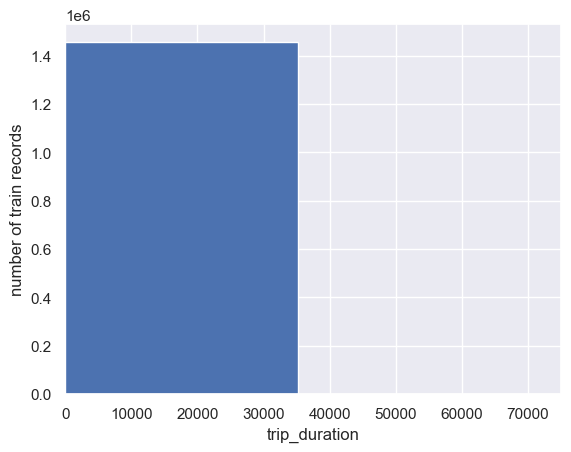

In [323]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

plt.hist(df["trip_duration"], bins=100)
plt.xlim(xmin=0, xmax=75000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Распределение имеет очень высокую плотность в определённом диапазоне значений. Но у нас могут быть тяжелые хвосты, которые не видно на этой гистограмме. Нарисуем эту же гистограмму в логарифмической шкале:

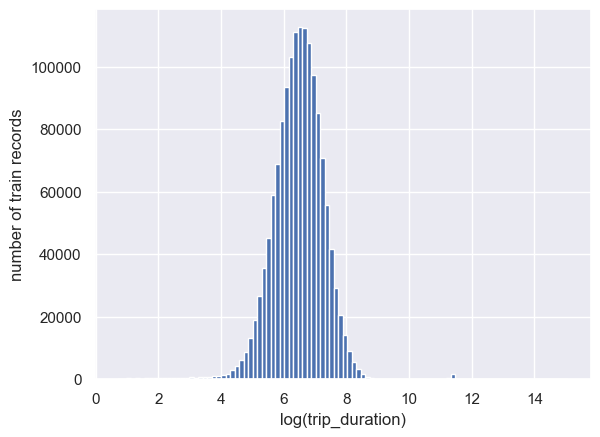

In [324]:
plt.hist(np.log1p(df['trip_duration'].values), bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

**Ответ**: Теперь распределение выглядит нормально)))).

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** Во-первых, заметили, что распределение логарифма таргета выглядит намного более адекватно, во-вторых, RMSLE измеряет относительную ошибку, а не абсолютную, что тоже обычно более логично.
 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [325]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# оказывается это только тут надо делать...

# добавим новую колонку:

df["log_trip_duration"] = np.log1p(df["trip_duration"])
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256


In [326]:
# удалим ненужный таргет

df.drop(columns=['trip_duration'], inplace=True)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [327]:
def rmsle(log1p_y_true, log1p_y_pred):
    n = len(log1p_y_pred)
    return np.sqrt((1 / n) * np.square(log1p_y_pred - log1p_y_true).sum())

n = len(df["log_trip_duration"]) # n - кол-во записей
X = np.ones(shape=(n, 1)) # X - вертикальный вектор из единиц
y = np.array(df["log_trip_duration"])[:, np.newaxis] # y - вертикальный вектор из наших тарегтов

rmsle_best_const = rmsle(y, (np.linalg.inv(X.T @ X) @ X.T @ y)[0][0] * np.ones(shape=(n, 1))) # считаем по формуле...
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411508


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

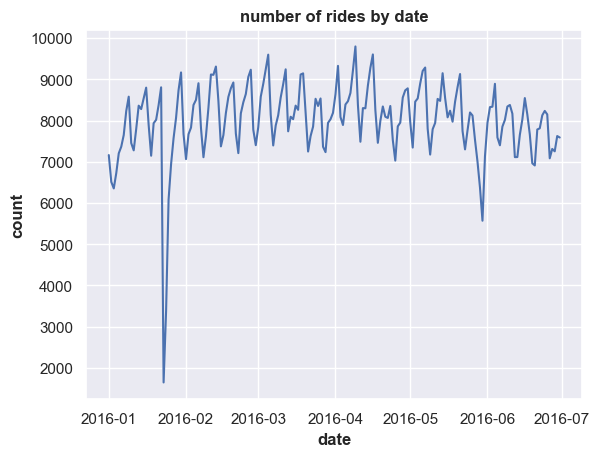

In [328]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
grouped_by_days = df.groupby([df["pickup_datetime"].dt.date])['id'].count().reset_index()
grouped_by_days
plt.xlabel(xlabel="date", fontweight="bold")
plt.ylabel(ylabel="count", fontweight="bold")
plt.title(label="number of rides by date", fontweight="bold")
plt.plot(grouped_by_days["pickup_datetime"], grouped_by_days["id"])

In [329]:
# Для ответа на вопрос найдём дни, в которых < 6000 поездок:
grouped_by_days[grouped_by_days["id"] < 6000]

,pickup_datetime,id
22,2016-01-23,1648
23,2016-01-24,3383
150,2016-05-30,5570


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: Обнаружили, что в США в январе 2016 была снежная буря (https://en.wikipedia.org/wiki/January_2016_United_States_blizzard),
а в мае был день поминовения (https://en.wikipedia.org/wiki/Memorial_Day) + вроде была непогода (https://www.weather.gov/okx/storm05302016)

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [330]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# группируем по дням и часам
grouped_by_time_weekday = df.groupby([df["pickup_datetime"].dt.hour, df["pickup_datetime"].dt.day_name()])["id"].count()

# переименуем оси чтобы не запутаться
grouped_by_time_weekday.rename_axis(["hour", "weekday"], inplace=True)

# сделаем из этого датафрейм
grouped_by_time_weekday = grouped_by_time_weekday.to_frame().reset_index()
grouped_by_time_weekday


,hour,weekday,id
0,0,Friday,8779
1,0,Monday,4299
2,0,Saturday,11768
3,0,Sunday,12270
4,0,Thursday,6299
...,...,...,...
163,23,Saturday,13166
164,23,Sunday,6367
165,23,Thursday,11715
166,23,Tuesday,8656


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


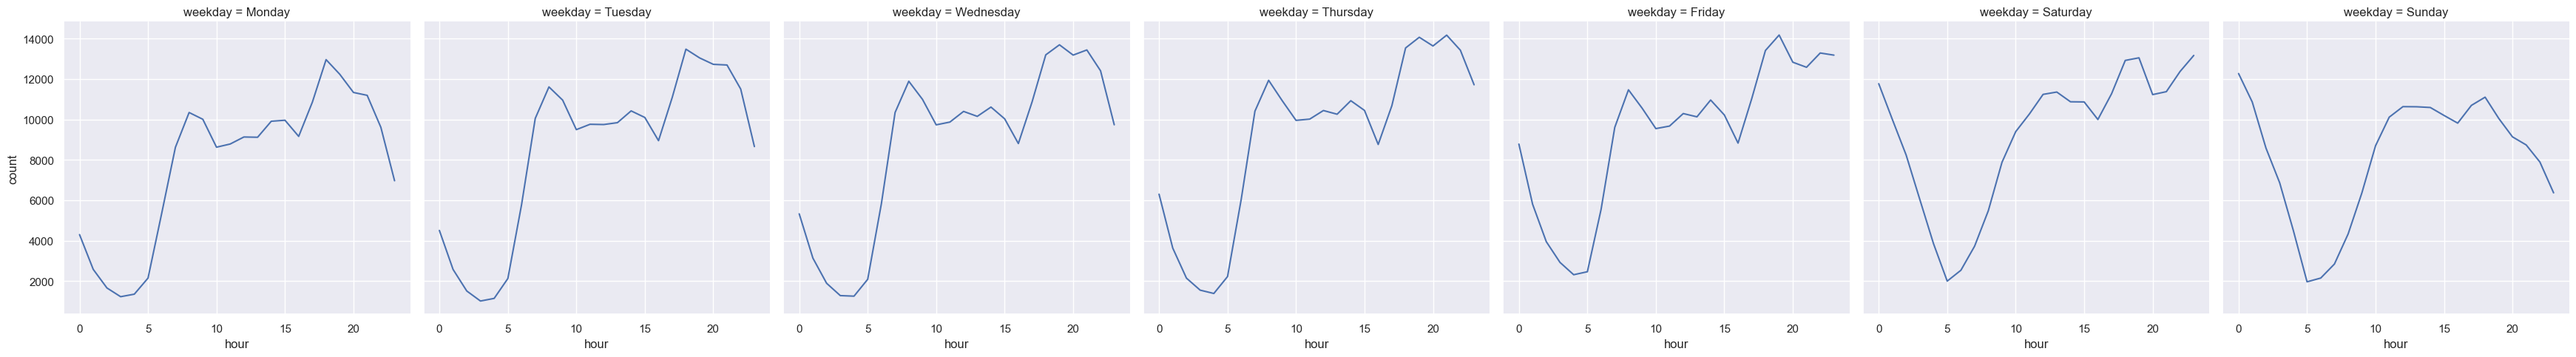

In [331]:
# строим графики:
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.relplot(data=grouped_by_time_weekday, x="hour", y="id", col="weekday", col_order=week_order, kind="line")
ax.set(ylabel="count")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


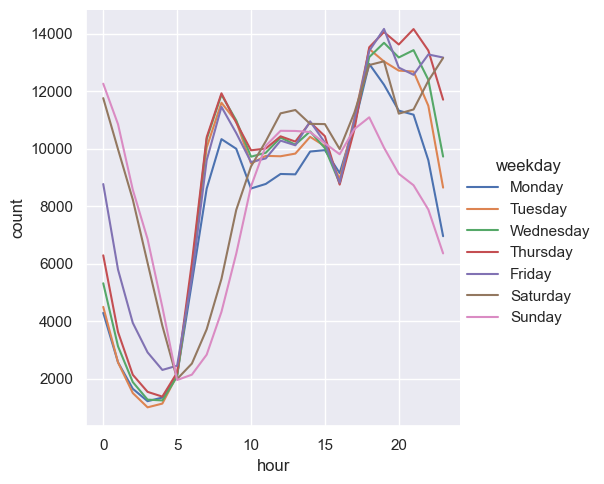

In [332]:
# сначала нарисуем графики для разных дней недели, т.к. у нас все для этого есть:

ax = sns.relplot(data=grouped_by_time_weekday, x="hour", y="id", hue="weekday", hue_order=week_order, kind="line")
ax.set(ylabel="count")

In [333]:
# а теперь аналогично предыдущему пункту сгруппируем по месяцам, а не по дням недели:

# группируем по месяцам и часам
grouped_by_time_month = df.groupby([df["pickup_datetime"].dt.hour, df["pickup_datetime"].dt.month_name()])["id"].count()

# переименуем оси чтобы не запутаться
grouped_by_time_month.rename_axis(["hour", "month"], inplace=True)

# сделаем из этого датафрейм
grouped_by_time_month = grouped_by_time_month.to_frame().reset_index()
grouped_by_time_month


,hour,month,id
0,0,April,9185
1,0,February,8445
2,0,January,8330
3,0,June,9150
4,0,March,8992
...,...,...,...
139,23,February,11042
140,23,January,10241
141,23,June,11899
142,23,March,12172


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


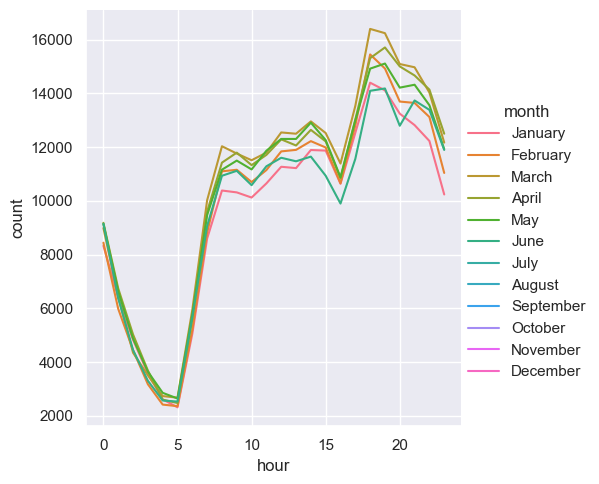

In [334]:
# нарисуем график:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.relplot(data=grouped_by_time_month, x="hour", y="id", hue="month", hue_order=month_order, kind="line")
ax.set(ylabel="count")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Из сравнения дней недели можно заметить, что в выходные люди начинают пользоваться такси позже (около 10-11 утра), а в рабочие дни - раньше (около 8 утра). Скорее всего это связано с тем, что в рабочие дни людям нужно раньше попасть на работу, а в выходные дни люди выдвигаются тогда, когда им удобно.

Из сравнения по месяцам можно заметить, что зимой люди пользуются такси чуть реже, чем в остальные времена года. Возможно, это связано с тем, что зимой больше пробок (из-за непогоды) и люди чаще пользуются общественным транспортом (например, метро, время поездки на котором не так сильно зависит от погоды). Однако можно так же заметить, что люди больше пользуются такси весной и осенью. Возможно, это из-за того, что больше людей берут отпуск летом.

По распределению поездок по времени суток можно сказать, что меньше всего поездок происходит примерно с 00 до 05 утра, тогда, когда большинство людей спят или им не надо никуда перемещаться. Так же видно пик поездок в примерно 18-19 часов. Скорее всего это происходит из-за того, что большинству людей надо попасть домой с работы (в выходные дни таких ярко выраженных пиков нет). 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [335]:
from sklearn.model_selection import train_test_split

# разобьем выборку:
train, test = train_test_split(df, test_size=0.3, random_state=57)


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

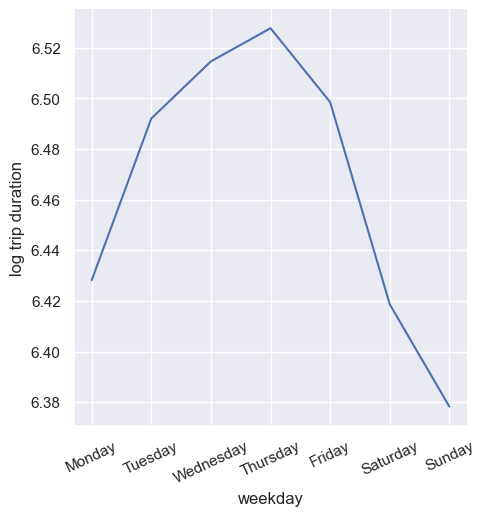

In [336]:
# график для дня недели:

train_gr_by_weekday = train.groupby([train["pickup_datetime"].dt.day_name()])["log_trip_duration"].mean().reindex(week_order).reset_index()
train_gr_by_weekday.rename(columns={"pickup_datetime": "weekday"}, inplace=True)

ax = sns.relplot(data=train_gr_by_weekday, x="weekday", y="log_trip_duration", kind="line")
ax.set(ylabel="log trip duration")
plt.xticks(rotation=25)

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


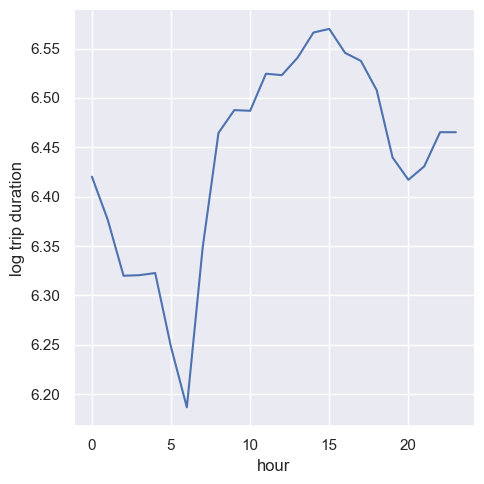

In [337]:
# график для времени начала поездки:

train_gr_by_hour = train.groupby([train["pickup_datetime"].dt.hour])["log_trip_duration"].mean().reset_index()
train_gr_by_hour.rename(columns={"pickup_datetime": "hour"}, inplace=True)

ax = sns.relplot(data=train_gr_by_hour, x="hour", y="log_trip_duration", kind="line")
ax.set(ylabel="log trip duration")

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([16801., 16832., 16861., 16892., 16922., 16953., 16983.]),
 [Text(16801.0, 0, '2016-01'),
  Text(16832.0, 0, '2016-02'),
  Text(16861.0, 0, '2016-03'),
  Text(16892.0, 0, '2016-04'),
  Text(16922.0, 0, '2016-05'),
  Text(16953.0, 0, '2016-06'),
  Text(16983.0, 0, '2016-07')])

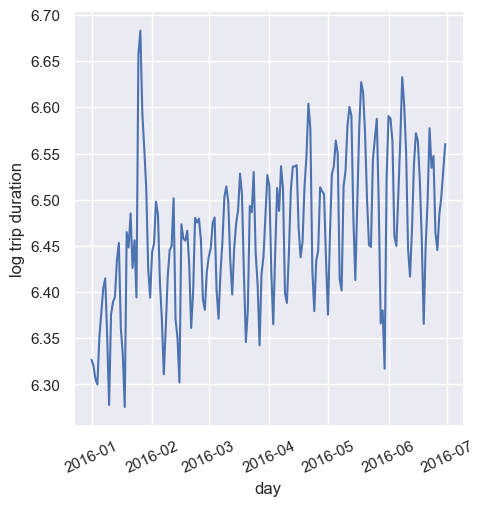

In [338]:
# график для дня начала поездки:

train_gr_by_day = train.groupby([train["pickup_datetime"].dt.date])["log_trip_duration"].mean().reset_index()
train_gr_by_day.rename(columns={"pickup_datetime": "day"}, inplace=True)


ax = sns.relplot(data=train_gr_by_day, x="day", y="log_trip_duration", kind="line")
ax.set(ylabel="log trip duration")
plt.xticks(rotation=25)


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: На графике зависимости от часа можно увидеть, что он довольно похож на график количества поездок. Скорее всего, длительность поездки возрастает в популярные часы из-за пробок на дорогах.

График зависимости от дня недели тоже довольно похож, скорее всего по той же причине - чем популярнее день, тем больше трафика на дорогах и, следовательно, больше пробок.

Про аномальные периоды: во время снежной бури (в январе) длительность поездки значительно выросла. Видимо, из-за непогоды на дорогах чаще возникали заторы. Однако в мае средняя длительность поездки наоборот снизилась. Сложно сказать, с чем конкретно это было связано. Может быть, из-за того, что это был выходной день и была непогода, многие люди воздержались от поездок на такси.

На графике зависимости от дня в году можно заметить, что в среднем длительность поездки увеличивается.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [339]:
# выделим признаки:
from datetime import date

df["pickup_weekday"] = df["pickup_datetime"].dt.weekday
df["pickup_month"] = df["pickup_datetime"].dt.month
df["pickup_hour"] = df["pickup_datetime"].dt.hour

# числа взял из одной из предыдущих клеток, где искали аномалии
df["is_winter_anomaly"] = ((df["pickup_datetime"].dt.date == date(2016, 1, 23)) | (df["pickup_datetime"].dt.date == date(2016, 1, 24))).astype(int)
df["is_spring_anomaly"] = (df["pickup_datetime"].dt.date == date(2016, 5, 30)).astype(int)

# найдем первый день и будем вычитать его из дат, чтобы найти день
min_day = df["pickup_datetime"].min()
df["day_number"] = (df["pickup_datetime"] - min_day).dt.days
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_weekday,pickup_month,pickup_hour,is_winter_anomaly,is_spring_anomaly,day_number
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,0,0,73
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,0,0,163
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,0,0,18
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,0,0,96
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,0,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,4,4,13,0,0,98
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,6,1,7,0,0,9
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,4,4,6,0,0,112
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,1,1,15,0,0,4


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Я считаю, что признаки "день недели", "месяц", "час", "является ли период аномальным" нужно сделать категориальными. Потому что у них нет промежуточных состояний (полу-понедельник, полу-вторник), у них мало состояний (7, 12, 24 и 2 соответственно), их нельзя сравнивать (нельзя сказать, что понедельник "меньше" чем среда и т.п.). День будем считать численным, т.к. во-первых, у него слишком много состояний, и во-вторых, потому что из графиков видно линейную зависимость логарифма продолжительности поездки от дня (она в среднем увеличивается).

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [340]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

categorical_features = ["pickup_weekday", "pickup_month", "pickup_hour", "is_winter_anomaly", "is_spring_anomaly"]
numeric_features = ["day_number",]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

train, test = train_test_split(df, test_size=0.3, random_state=57)

X_train = train[categorical_features + numeric_features]
y_train = train["log_trip_duration"]

X_test = test[categorical_features + numeric_features]
y_test = test["log_trip_duration"]

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle(y_test, y_pred)



0.7898162441641018

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [341]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [342]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [343]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Видно, что выделяются аэропорты, они довольно далеко от основной массы точек и они образуют небольшие скопления. Возможно, стоит выделить отправление из этих точек и приезд в них в отдельные категориальные признаки. Это может быть полезно, т.к. длительность поездки до аэропортов может строиться по другим правилом, в отличии от коротких поездок по манхэттену.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [344]:
# возьмём код с первого семинара

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df["haversine"] = haversine_array(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])



Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [345]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df["log_haversine"] = np.log1p(df["haversine"])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [346]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [347]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# чтобы получить продолжительность поездки, возведем e в степень log_trip_duration и получим продолжительность поездки в секундах.\
# чтобы скорость была чуть более интерпретируема, переведем секунды в часы, поделив секунды на 60 * 60 = 3600
df["avg_speed"] = df["haversine"] / (np.exp(df["log_trip_duration"]) - 1) * 3600   # тут вычли 1 потому что log1p(x) = ln(x + 1)   =>    e^(ln(x + 1)) = x + 1   =>  x = e^(ln(x + 1)) - 1


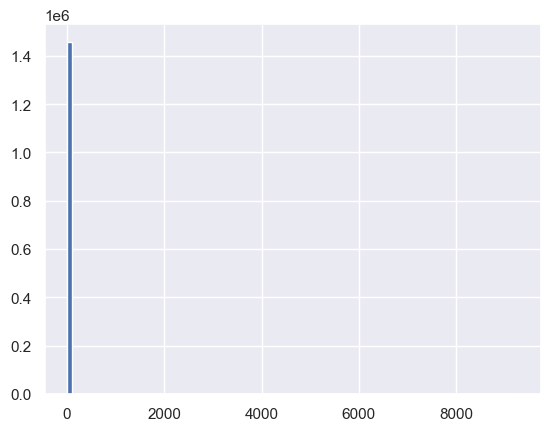

In [348]:
# построим гистограмму:
plt.hist(df["avg_speed"], bins=100)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

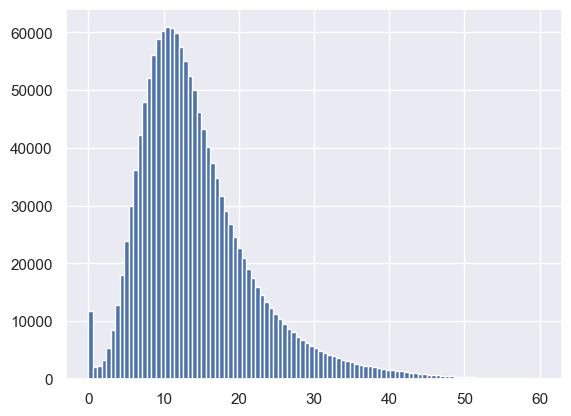

In [349]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df[df["avg_speed"] < 60]["avg_speed"], bins=100)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [350]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
day_hour_matrix = np.zeros((7, 24))
for i in range(7):
    for j in range(24):
        day_hour_matrix[i][j] = df[(df["pickup_datetime"].dt.weekday == i) & (df["pickup_datetime"].dt.hour == j)]["avg_speed"].mean()
day_hour_matrix

array([[22.3671361 , 22.07726288, 21.75404014, 22.20970197, 25.28828606,
        24.90640317, 20.31856365, 15.6550846 , 12.66778508, 12.25959622,
        12.48451108, 12.66383808, 12.55767821, 13.01551164, 12.91464191,
        12.73473906, 13.14686579, 13.09818841, 13.83181428, 15.18611402,
        16.97820264, 17.4437013 , 17.88365575, 19.68106791],
       [20.55084052, 21.57471782, 21.69899809, 22.74065966, 24.77167658,
        24.09644945, 19.4171789 , 14.51240895, 11.41701353, 10.80817879,
        10.76596841, 10.71622982, 10.85076243, 11.1761885 , 11.27343229,
        11.17339286, 11.87684494, 11.72317195, 12.01669719, 13.86134896,
        15.55848924, 16.28973643, 16.88972954, 18.31579948],
       [19.40030396, 20.75704666, 21.25849765, 21.81628521, 24.25707768,
        24.13773777, 19.6244127 , 14.59184387, 11.64812978, 10.96465982,
        10.85600929, 10.61872209, 10.48644143, 10.83785733, 10.81073485,
        10.82915665, 11.61154598, 11.28227538, 11.60061318, 13.06644923,
  

[Text(0.5, 20.049999999999997, 'hour'), Text(47.25, 0.5, 'weekday')]

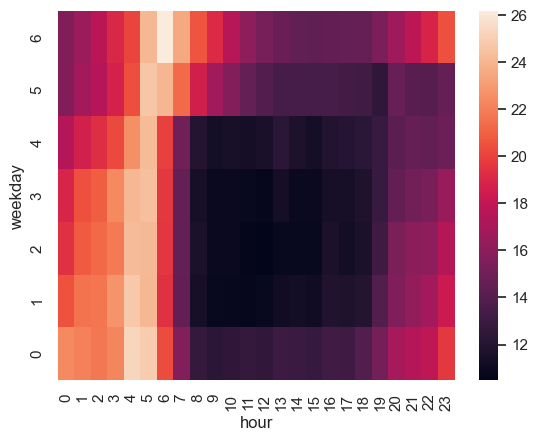

In [351]:
ax = sns.heatmap(day_hour_matrix)

# перевернул ось дней, потому что она шла в обратном порядке
ax.invert_yaxis()

ax.set(xlabel="hour", ylabel="weekday")


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что скорость зависит от самого таргета (времени)

In [352]:
# удалим колонку скоростей:
df.drop(columns=["avg_speed"], inplace=True)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_weekday,pickup_month,pickup_hour,is_winter_anomaly,is_spring_anomaly,day_number,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,0,0,73,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,0,0,163,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,0,0,18,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,0,0,96,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,0,0,85,1.188588,0.783257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,4,4,13,0,0,98,1.225080,0.799793
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,6,1,7,0,0,9,6.049836,1.953004
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,4,4,6,0,0,112,7.824606,2.177544
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,1,1,15,0,0,4,1.092564,0.738390


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Методом пристального взгляда обнаруживаем, что скорость минимальна с 7 до 19 в рабочие дни, а максимальна в 4-6 в рабочие дни и 5-8 в выходные

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [353]:
# будем считать что поездка совершается в период пробок, если она началась с 8 до 18 часов в рабочий день
# и в период свободных дорог если начинается в 5-6 утра в рабочие дни и в 6-8 утра в выходные

df["is_traffic_jam"] = np.where((df["pickup_datetime"].dt.weekday <= 4) &       # рабочие дни
                                (8 <= df["pickup_datetime"].dt.hour) &          # с 7 утра
                                (df["pickup_datetime"].dt.hour <= 19), 1, 0)    # до 19 вечера

df["free_roads"] = np.where(((df["pickup_datetime"].dt.weekday <= 4) &          # рабочие дни
                             (4 <= df["pickup_datetime"].dt.hour) &             # с 4 утра
                             (df["pickup_datetime"].dt.hour <= 6)) |            # до 6 утра
                             ((df["pickup_datetime"].dt.weekday >= 5) &         # или выходные дни
                             (5 <= df["pickup_datetime"].dt.hour) &             # с 5 утра
                             (df["pickup_datetime"].dt.hour <= 7)),             # до 8 утра
                              1, 0)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_weekday,pickup_month,pickup_hour,is_winter_anomaly,is_spring_anomaly,day_number,haversine,log_haversine,is_traffic_jam,free_roads
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0,3,17,0,0,73,1.498521,0.915699,1,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,0,0,163,1.805507,1.031584,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,0,0,18,6.385098,1.999464,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2,4,19,0,0,96,1.485498,0.910473,1,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,5,3,13,0,0,85,1.188588,0.783257,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,4,4,13,0,0,98,1.225080,0.799793,1,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,6,1,7,0,0,9,6.049836,1.953004,0,1
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,4,4,6,0,0,112,7.824606,2.177544,0,1
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,1,1,15,0,0,4,1.092564,0.738390,1,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [354]:
# запишем координаты прямоугольников, в которых расположены аэропорты:

kennedy_lat1, kennedy_lng1 = 40.670410, -73.810752
kennedy_lat2, kennedy_lng2 = 40.619232, -73.769463

la_guardia_lat1, la_guardia_lng1 = 40.785057, -73.880235
la_guardia_lat2, la_guardia_lng2 = 40.762181, -73.864734

# тут ставлю YES и NO т.к. если ставить 1 и 0 или True и False, то ящики с усами строятся очень долго и рисуют полную дичь.

df["start_in_kennedy"] = np.where((df["pickup_latitude"] <= kennedy_lat1) &
                                  (df["pickup_latitude"] >= kennedy_lat2) &
                                  (df["pickup_longitude"] >= kennedy_lng1) &
                                  (df["pickup_longitude"] <= kennedy_lng2), 1, 0)

df["end_in_kennedy"] = np.where((df["dropoff_latitude"] <= kennedy_lat1) &
                                  (df["dropoff_latitude"] >= kennedy_lat2) &
                                  (df["dropoff_longitude"] >= kennedy_lng1) &
                                  (df["dropoff_longitude"] <= kennedy_lng2), 1, 0)

df["start_in_la_guardia"] = np.where((df["pickup_latitude"] <= la_guardia_lat1) &
                                  (df["pickup_latitude"] >= la_guardia_lat2) &
                                  (df["pickup_longitude"] >= la_guardia_lng1) &
                                  (df["pickup_longitude"] <= la_guardia_lng2), 1, 0)

df["end_in_la_guardia"] = np.where((df["dropoff_latitude"] <= la_guardia_lat1) &
                                  (df["dropoff_latitude"] >= la_guardia_lat2) &
                                  (df["dropoff_longitude"] >= la_guardia_lng1) &
                                  (df["dropoff_longitude"] <= la_guardia_lng2), 1, 0)

df.dtypes


id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
log_trip_duration             float64
pickup_weekday                  int32
pickup_month                    int32
pickup_hour                     int32
is_winter_anomaly               int32
is_spring_anomaly               int32
day_number                      int64
haversine                     float64
log_haversine                 float64
is_traffic_jam                  int32
free_roads                      int32
start_in_kennedy                int32
end_in_kennedy                  int32
start_in_la_guardia             int32
end_in_la_guardia               int32
dtype: object

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

[Text(0.5, 0, 'log trip duration'), Text(0, 0.5, 'end in la guardia')]

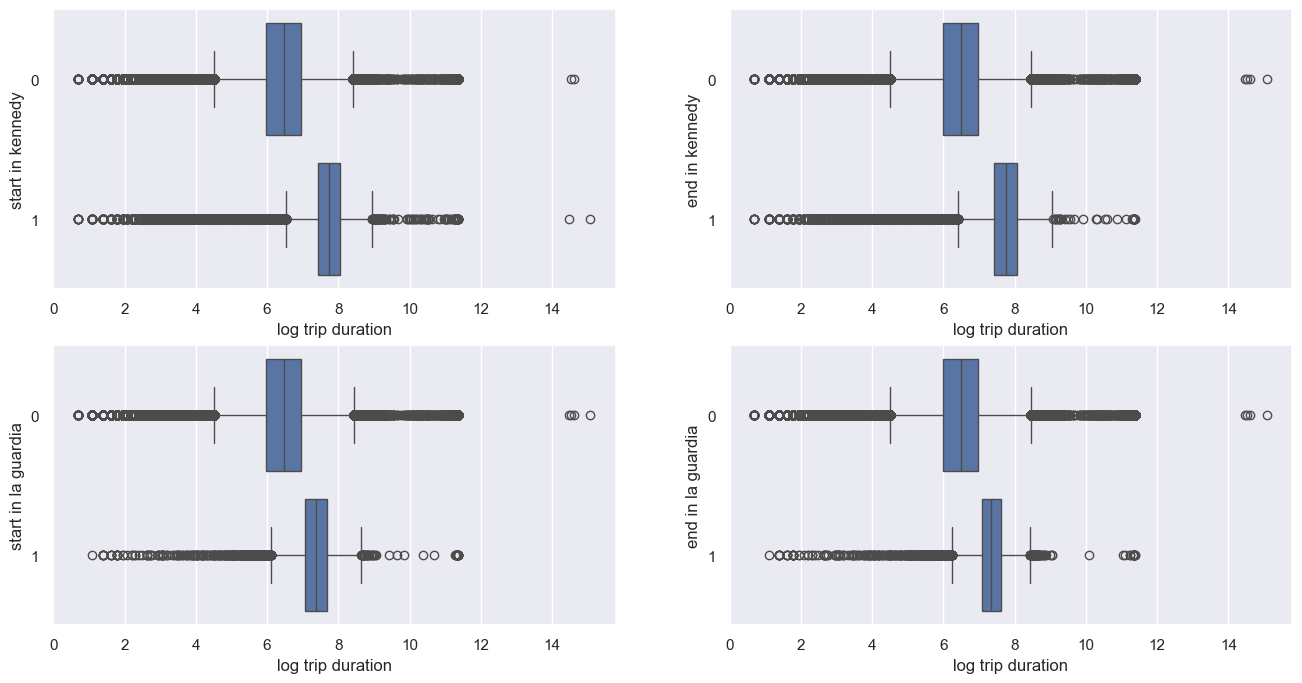

In [355]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(2, 2, figsize=(16,8))

x = "log_trip_duration"
xlabel = "log trip duration"

fig.set_label("boxplots for new features")

sns.boxplot(ax=axes[0][0], data=df, x=x, y="start_in_kennedy", orient="h")
axes[0][0].set(xlabel=xlabel, ylabel="start in kennedy")

sns.boxplot(ax=axes[0][1], data=df, x=x, y="end_in_kennedy", orient="h")
axes[0][1].set(xlabel=xlabel, ylabel="end in kennedy")

sns.boxplot(ax=axes[1][0], data=df, x=x, y="start_in_la_guardia", orient="h")
axes[1][0].set(xlabel=xlabel, ylabel="start in la guardia")

sns.boxplot(ax=axes[1][1], data=df, x=x, y="end_in_la_guardia", orient="h")
axes[1][1].set(xlabel=xlabel, ylabel="end in la guardia")

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Разброс длины поездки, когда она начинается в аэропортах, заметно меньше $\Rightarrow$ эти признаки достаточно хорошие 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [356]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently


class MapGridTransformer(BaseEstimator, TransformerMixin):
    # alpha это процент точек, вокруг которых мы хотим обводить сетку
    def __init__(
        self,
        lat_col_name: str,
        lng_col_name: str,
        alpha: float = 0.7,
        lat_cell_num: int = 1,
        lng_cell_num: int = 1,
        grid_col_name: str = "grid",
    ):
        self.lat_col_name = lat_col_name
        self.lng_col_name = lng_col_name
        self.alpha = alpha
        self.lat_cell_num = lat_cell_num
        self.lng_cell_num = lng_cell_num
        self._cdots = None
        self.cells = None
        self.grid_col_name = grid_col_name

    def show_map(self):

        # выбросим ошибку если еще не сделали fit:
        if self._cdots is None:
            raise Exception("fit must be called first")

        # найдем границы нашего бокса
        bot_lat = self._cdots.min(0).min(0)[0]
        top_lat = self._cdots.max(0).max(0)[0]
        left_lng = self._cdots.min(1).min(0)[1]
        right_lng = self._cdots.max(1).max(0)[1]

        # зададим центр нашей карты
        m = folium.Map(location=[(bot_lat + top_lat) / 2, (left_lng + right_lng) / 2])
        
        # и удостоверимся, что в неё помещается наша сетка
        m.fit_bounds([(bot_lat, left_lng), (top_lat, right_lng)])
        
        # добавим на карту точки, означающие центры наших клеток
        for i in range(self.lng_cell_num):
            for j in range(self.lat_cell_num):
                folium.Circle(
                    radius=100,
                    location=((self.cells[i][j][0] + self.cells[i][j][1]) / 2), # т.к. клетка хранятся как координаты её противоположных углов,
                                                                                # найдем центр, поделив пополам сумму координат
                    color="red",
                    fill_color="red",
                    fill=True,
                ).add_to(m)
                
        # нанесём вертикальные линии
        m.add_child(folium.PolyLine(self._cdots, color="red"))
        
        # и горизонтальные
        m.add_child(folium.PolyLine(np.swapaxes(self._cdots, 0, 1), color="red"))
        return m

    def fit(self, X: pd.DataFrame = None, y=None):
        self._cdots = np.zeros((self.lng_cell_num + 1, self.lat_cell_num + 1, 2))

        # поместим колонки в удобные переменные
        lats = X[self.lat_col_name]
        lngs = X[self.lng_col_name]

        # вычислим крайние точки для выбранного нами числа точек
        low_lat = lats.quantile((1 - self.alpha) / 2)
        high_lat = lats.quantile(1 - (1 - self.alpha) / 2)
        low_lng = lngs.quantile((1 - self.alpha) / 2)
        high_lng = lngs.quantile(1 - (1 - self.alpha) / 2)

        # посчитаем левые границы клеток: при помощи np.arange получим array с левыми границами,
        # сделаем этот массив двумерным и прибавим нули справа чтобы можно было легко сложить с матрицей self.cells
        lat_ticks = np.pad(
            np.linspace(low_lat, high_lat, self.lat_cell_num + 1, endpoint=True)[:, np.newaxis],
            [(0, 0), (0, 1)],
        )
        self._cdots += lat_ticks

        # сначала аналогично широте
        lng_ticks = np.pad(
            np.linspace(low_lng, high_lng, self.lng_cell_num + 1, endpoint=True)[:, np.newaxis],
            [(0, 0), (1, 0)],
        )
        
        # теперь надо преобразовать в необходимую форму: сделаем 3-х мерный массив с нужными размерами измерений и прибавим его к self.cells
        res_lng_ticks = np.array(
            [
                np.repeat(lng_tick[np.newaxis, :], self.lat_cell_num + 1, axis=0)
                for lng_tick in lng_ticks
            ]
        )
        self._cdots += res_lng_ticks
        
        # теперь сохраним координаты самих клеток как координаты противоположних её углов
        self.cells = np.zeros((self.lng_cell_num, self.lat_cell_num, 2, 2))
        for i in range(self.lng_cell_num):
            for j in range(self.lat_cell_num):
                self.cells[i][j][0] = self._cdots[i][j]
                self.cells[i][j][1] = self._cdots[i + 1][j + 1]
        return self

    def transform(self, X: pd.DataFrame, y=None):
        res_transform = X.copy(deep=True)
        res_transform[self.grid_col_name] = -1
        
        for i in range(self.lng_cell_num):
            for j in range(self.lat_cell_num):
                
                res_transform.loc[(res_transform[self.lat_col_name] >= self.cells[i][j][0][0]) &
                              (res_transform[self.lat_col_name] <= self.cells[i][j][1][0]) & 
                              (res_transform[self.lng_col_name] >= self.cells[i][j][0][1]) &
                              (res_transform[self.lng_col_name] <= self.cells[i][j][1][1]), self.grid_col_name] = i * self.lat_cell_num + j
                
            
        return res_transform


transformer = MapGridTransformer(
    "pickup_latitude", "pickup_longitude", lat_cell_num=4, lng_cell_num=3, alpha=0.88
)

In [357]:
transformed_df = transformer.fit_transform(df)

In [358]:
transformer.show_map()

In [359]:
transformed_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,day_number,haversine,log_haversine,is_traffic_jam,free_roads,start_in_kennedy,end_in_kennedy,start_in_la_guardia,end_in_la_guardia,grid
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,...,73,1.498521,0.915699,1,0,0,0,0,0,7
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,...,163,1.805507,1.031584,0,0,0,0,0,0,5
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,...,18,6.385098,1.999464,1,0,0,0,0,0,6
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,...,96,1.485498,0.910473,1,0,0,0,0,0,-1
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,...,85,1.188588,0.783257,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,...,98,1.225080,0.799793,1,0,0,0,0,0,5
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,...,9,6.049836,1.953004,0,1,0,0,0,0,1
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,...,112,7.824606,2.177544,0,1,0,0,0,0,11
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,...,4,1.092564,0.738390,1,0,0,0,0,0,6


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [360]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features = [    # новые признаки
                        "start_in_cell",
                        "end_in_cell",
                        "is_traffic_jam",
                        "free_roads",
                        "start_in_kennedy",
                        "end_in_kennedy",
                        "start_in_la_guardia",
                        "end_in_la_guardia",
                        
                            # старые признаки
                        "pickup_weekday",
                        "pickup_month",
                        "pickup_hour",
                        "is_winter_anomaly",
                        "is_spring_anomaly",
                        ]

numeric_features = ["day_number", "log_haversine"]

df = MapGridTransformer("pickup_latitude", "pickup_longitude", alpha=0.88, lat_cell_num=4, lng_cell_num=3, grid_col_name="start_in_cell").fit_transform(df)
df = MapGridTransformer("dropoff_latitude", "dropoff_longitude", alpha=0.88, lat_cell_num=4, lng_cell_num=3, grid_col_name="end_in_cell").fit_transform(df)

df
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='if_binary'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

train, test = train_test_split(df, test_size=0.3, random_state=57)

X_train = train[categorical_features + numeric_features]
y_train = train["log_trip_duration"]

X_test = test[categorical_features + numeric_features]
y_test = test["log_trip_duration"]

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle(y_test, y_pred)


0.4757313349179077

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: __vendor_id__: может быть, разные агенства такси используют разные навигаторы, и один из них может значительно сокращать время поездки

__passenger_count__: Возможно, люди чаще группируются при дальних поездках

__store_and_fwd_flag__: Возможно, пропажа интернета свидетельствует о дальней поездке (если поездка была короткой, скорее всего она закончилась в городе и в нём все еще хорошо работает интернет)

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [361]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(len(df["vendor_id"].unique()))
print(len(df["passenger_count"].unique()))
print(len(df["store_and_fwd_flag"].unique()))

2
10
2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

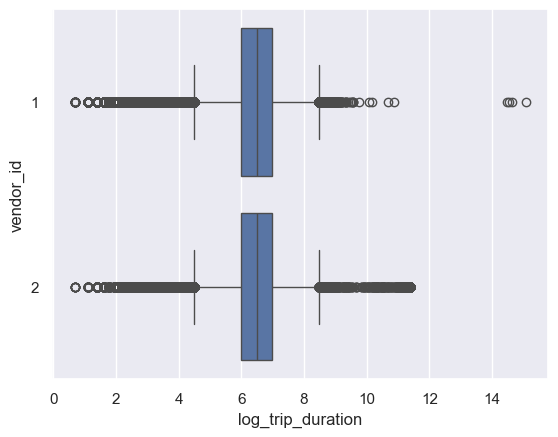

In [362]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(df, x="log_trip_duration", y="vendor_id", orient="h")
plt.show()

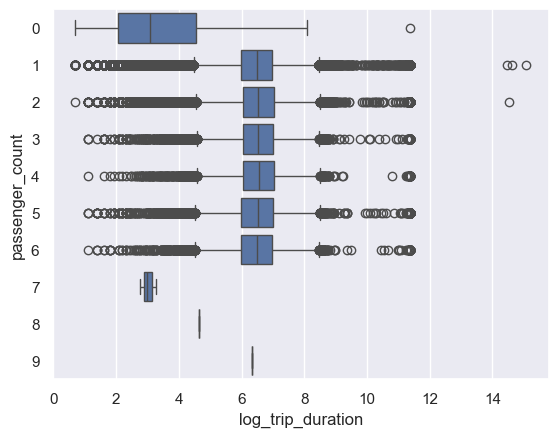

In [363]:
sns.boxplot(df, x="log_trip_duration", y="passenger_count", orient="h")
plt.show()

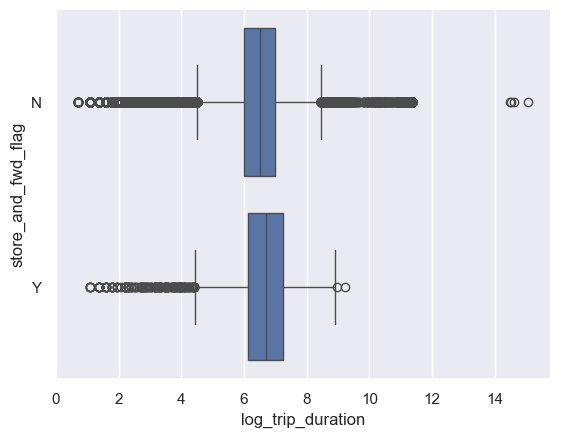

In [364]:
sns.boxplot(df, x="log_trip_duration", y="store_and_fwd_flag", orient="h")
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [365]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df["vendor_id"] = np.where(df["vendor_id"] == 1, 1, 0)
df["store_and_fwd_flag"] = np.where(df["store_and_fwd_flag"] == "Y", 1, 0)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,haversine,log_haversine,is_traffic_jam,free_roads,start_in_kennedy,end_in_kennedy,start_in_la_guardia,end_in_la_guardia,start_in_cell,end_in_cell
0,id2875421,0,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,6.122493,...,1.498521,0.915699,1,0,0,0,0,0,7,6
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,6.498282,...,1.805507,1.031584,0,0,0,0,0,0,5,1
2,id3858529,0,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661527,...,6.385098,1.999464,1,0,0,0,0,0,6,0
3,id3504673,0,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,6.063785,...,1.485498,0.910473,1,0,0,0,0,0,-1,-1
4,id2181028,0,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,6.077642,...,1.188588,0.783257,0,0,0,0,0,0,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,0,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,6.658011,...,1.225080,0.799793,1,0,0,0,0,0,5,1
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,6.486161,...,6.049836,1.953004,0,1,0,0,0,0,1,-1
1458641,id2304944,0,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,6.639876,...,7.824606,2.177544,0,1,0,0,0,0,11,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,5.924256,...,1.092564,0.738390,1,0,0,0,0,0,6,6


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Видно, что продолжительность поездки для разных vendor_id почти не отличается, аналогично для store_and_fwd_flag. Для passenger_cnt заметно, что если человек вовсе не пришел, то поездка занимает значительно меньшее кол-во времени. Но для большинства значений разница небольшая. Можно предположить, что признаки не слишком сильные.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [366]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features = [    # новые признаки
                        "vendor_id",
                        "store_and_fwd_flag",
                        "passenger_count",
                        
                            # старые признаки
                        "start_in_cell",
                        "end_in_cell",
                        "is_traffic_jam",
                        "free_roads",
                        "start_in_kennedy",
                        "end_in_kennedy",
                        "start_in_la_guardia",
                        "end_in_la_guardia",
                        "pickup_weekday",
                        "pickup_month",
                        "pickup_hour",
                        "is_winter_anomaly",
                        "is_spring_anomaly",
                        ]

numeric_features = ["day_number", "log_haversine"]


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='if_binary'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

train, test = train_test_split(df, test_size=0.3, random_state=57)

X_train = train[categorical_features + numeric_features]
y_train = train["log_trip_duration"]

X_test = test[categorical_features + numeric_features]
y_test = test["log_trip_duration"]

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle(y_test, y_pred)

0.4752512418885777

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [367]:
# не дали значительного улучшения => выбросим их
df.drop(columns=["vendor_id", "store_and_fwd_flag", "passenger_count"], inplace=True)
df

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,pickup_weekday,pickup_month,pickup_hour,...,haversine,log_haversine,is_traffic_jam,free_roads,start_in_kennedy,end_in_kennedy,start_in_la_guardia,end_in_la_guardia,start_in_cell,end_in_cell
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,6.122493,0,3,17,...,1.498521,0.915699,1,0,0,0,0,0,7,6
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,6.498282,6,6,0,...,1.805507,1.031584,0,0,0,0,0,0,5,1
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,7.661527,1,1,11,...,6.385098,1.999464,1,0,0,0,0,0,6,0
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,6.063785,2,4,19,...,1.485498,0.910473,1,0,0,0,0,0,-1,-1
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,6.077642,5,3,13,...,1.188588,0.783257,0,0,0,0,0,0,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,6.658011,4,4,13,...,1.225080,0.799793,1,0,0,0,0,0,5,1
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,6.486161,6,1,7,...,6.049836,1.953004,0,1,0,0,0,0,1,-1
1458641,id2304944,2016-04-22 06:57:41,-73.959129,40.768799,-74.004433,40.707371,6.639876,4,4,6,...,7.824606,2.177544,0,1,0,0,0,0,11,0
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,5.924256,1,1,15,...,1.092564,0.738390,1,0,0,0,0,0,6,6


## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [368]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, test = train_test_split(df, test_size=0.3, random_state=42)

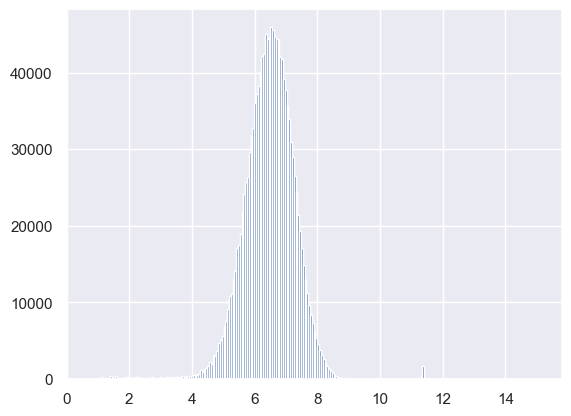

In [369]:
plt.hist(df["log_trip_duration"], bins=250)
plt.show()

In [370]:
# удалим < 3.5
start_len = len(train)
train.drop(train[train["log_trip_duration"] < 3.5].index, inplace=True)
start_len - len(train)

3640

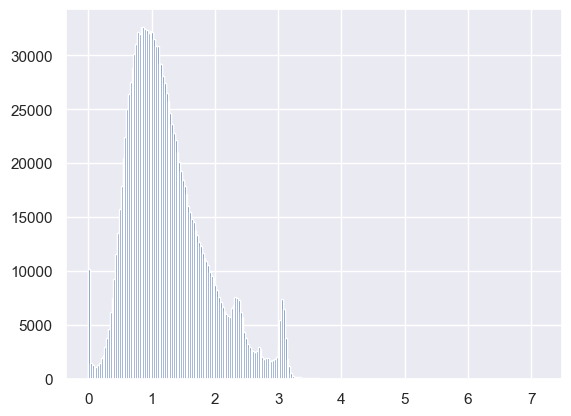

In [371]:
plt.hist(df["log_haversine"], bins=250)
plt.show()

In [372]:
# уберем > 3.5
start_len = len(train)
train.drop(train[train["log_haversine"] > 3.5].index, inplace=True)
start_len - len(train)

305

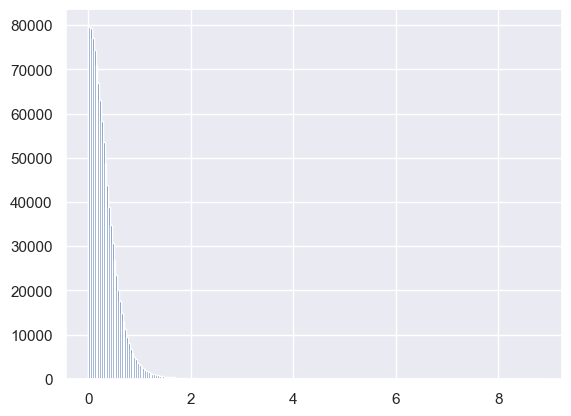

In [373]:
categorical_features = [                 
                        # старые признаки
                        "start_in_cell",
                        "end_in_cell",
                        "is_traffic_jam",
                        "free_roads",
                        "start_in_kennedy",
                        "end_in_kennedy",
                        "start_in_la_guardia",
                        "end_in_la_guardia",
                        "pickup_weekday",
                        "pickup_month",
                        "pickup_hour",
                        "is_winter_anomaly",
                        "is_spring_anomaly",
                        ]

numeric_features = ["day_number", "log_haversine"]


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='if_binary'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

X_train = train[categorical_features + numeric_features]
y_train = train["log_trip_duration"]

model = pipeline.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
plt.hist(abs(y_train - y_train_pred), bins=250)
plt.show()

In [374]:
# уберем те, для кого остатки регрессии > 2:
start_len = len(train)
train.drop(train[abs(train["log_trip_duration"] - y_train_pred) > 2].index, inplace=True)
start_len - len(train)

2778

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

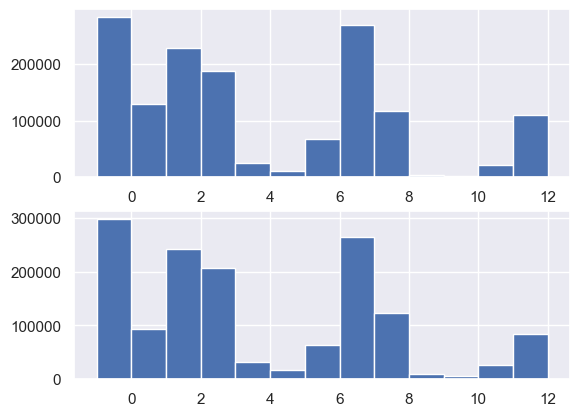

In [375]:
# для бинарных признаков рассматривать такое смысла не имеет, будем рассматривать только для признаков с множеством категорий

multiple_categories = [
    "start_in_cell",
    "end_in_cell",
    "pickup_weekday",
    "pickup_month",
    "pickup_hour",
]
fig, ax = plt.subplots(2, 1)
ax[0].hist(df["start_in_cell"], range(-1, 13))
ax[1].hist(df["end_in_cell"], range(-1, 13))
plt.show()

In [388]:
# видим, что стоит объединить 8 и 9 клетки
df.loc[df["start_in_cell"] == 9, "start_in_cell"] = 8
df.loc[df["end_in_cell"] == 9, "end_in_cell"] = 8

train.loc[train["start_in_cell"] == 9, "start_in_cell"] = 8
train.loc[train["end_in_cell"] == 9, "end_in_cell"] = 8

test.loc[test["start_in_cell"] == 9, "start_in_cell"] = 8
test.loc[test["end_in_cell"] == 9, "end_in_cell"] = 8

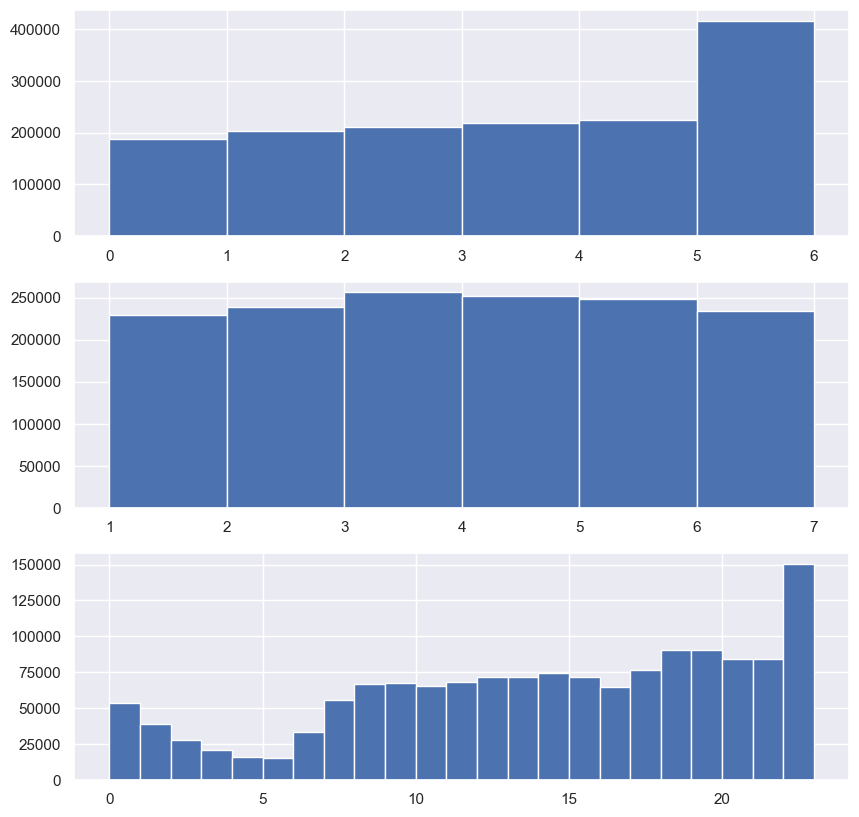

In [391]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].hist(df["pickup_weekday"], range(0, 7))
ax[1].hist(df["pickup_month"], range(1, 8))
ax[2].hist(df["pickup_hour"], range(0, 24))
plt.show()

# видим, что тут все ок

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [392]:
categorical_features = [                 
                        # старые признаки
                        "start_in_cell",
                        "end_in_cell",
                        "is_traffic_jam",
                        "free_roads",
                        "start_in_kennedy",
                        "end_in_kennedy",
                        "start_in_la_guardia",
                        "end_in_la_guardia",
                        "pickup_weekday",
                        "pickup_month",
                        "pickup_hour",
                        "is_winter_anomaly",
                        "is_spring_anomaly",
                        ]

numeric_features = ["day_number", "log_haversine"]


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop='if_binary'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

X_train = train[categorical_features + numeric_features]
y_train = train["log_trip_duration"]

X_test = test[categorical_features + numeric_features]
y_test = test["log_trip_duration"]


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle(y_test, y_pred)

0.47528498457916435

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [393]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1014327, 15)
Size after OneHot: (1014327, 71)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [394]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

X_train = train[categorical_features + numeric_features]
y_train = train["log_trip_duration"]

X_test = test[categorical_features + numeric_features]
y_test = test["log_trip_duration"]


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle(y_test, y_pred)

# выдает константное предсказание...

0.7950480638991828

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [379]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_val, val = train_test_split(train, test_size=0.2, random_state=42)

X_train_val = train_val[categorical_features + numeric_features]
y_train_val = train_val["log_trip_duration"]

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [380]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [381]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [382]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [383]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [384]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [385]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.